In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

#### 데이터 불러오기

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/daily_python/220822/data/titanic.csv")

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 데이터 설명

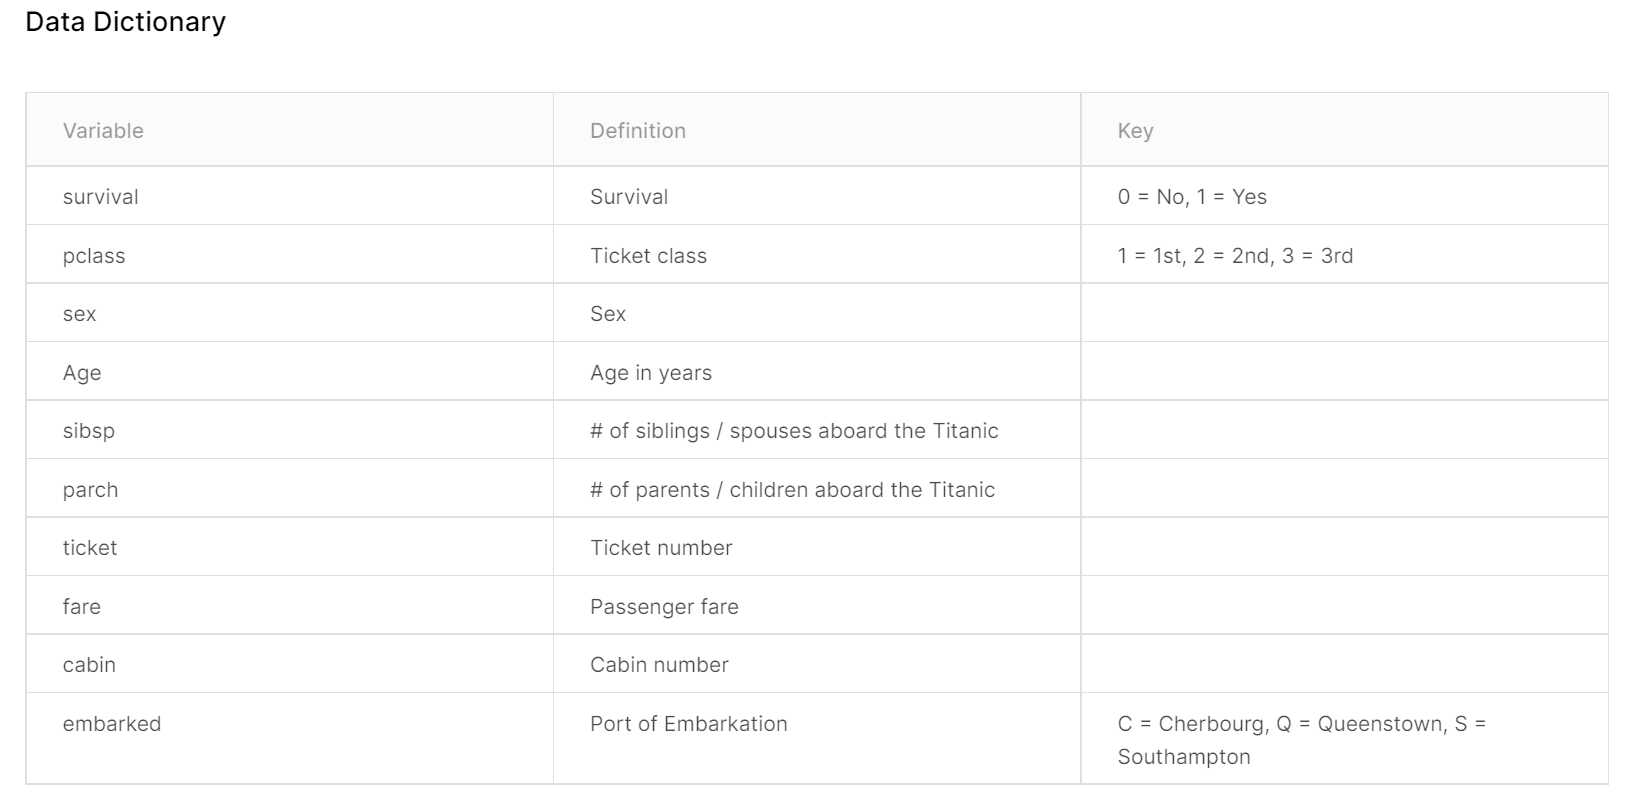

승객의 생존여부, 탑승 클래스,이름,성별,탑승한 형제/배우자수, 탑승한 자녀/부모수, 티켓번호, 요금, 객실번호, 승선항

## 분석 목적

#### 이 분석을 통해 알고싶은 것은 어떤 요인이 생존여부에 큰 영향을 미쳤는가

승객의 이름, 티켓번호 등을 제외하겠습니다.

(객실번호와 승선항은 배의 객실 위치와 같은 다른 요인과 관련성이 있을 수 있으므로 제외하지 않음)

### EDA

#### 진행과정
1. 변수 채택 및 새로운 칼럼 생성(가족)
2. Nan 값 대체하기
3. 변수 별 분포확인
4. 변수 별 상관관계 확인

In [4]:
## 1. 변수 채택 및 새로운 칼럼 생성
# 새로운 변수 추가
df['Family_num'] = df['SibSp']+df['Parch']

# 변수 채택
data = df[['PassengerId','Survived','Pclass','Sex','Age','Family_num','Fare','Cabin','Embarked']]

In [5]:
data

,PassengerId,Survived,Pclass,Sex,Age,Family_num,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,7.2500,NaN,S
1,2,1,1,female,38.0,1,71.2833,C85,C
2,3,1,3,female,26.0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,53.1000,C123,S
4,5,0,3,male,35.0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,30.0000,B42,S
888,889,0,3,female,NaN,3,23.4500,NaN,S
889,890,1,1,male,26.0,0,30.0000,C148,C


In [6]:
## Nan값 대체하기
# 칼럼별 Nan값의 수 파악하기
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Family_num       0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 잠깐!! Nan값을 대체하는 방법

1. 그냥 지운다!! 
2. 평균값 혹은 최빈값으로 대체한다.
3. 회귀 분석으로 얻은 값으로 대체한다.

총 3개의 칼럼에 Nan값이 존재하며 Age는 회귀분석 값으로 대체, Embarked는 최빈값, Cabin은 칼럼 삭제

In [7]:
# 2-1 그냥 지운다.
data = data.drop('Cabin', axis=1)

In [8]:
# 2-2 최빈값 대체
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [9]:
data['Embarked'].fillna('S', inplace=True)

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Family_num       0
Fare             0
Embarked         0
dtype: int64

#### 범주형 변수를 Binary로 변경

dummy를 사용

In [11]:
## 범주형 변수 Binary
# Sex의 male =0, female = 1로 변경
dummy = pd.get_dummies(df['Sex'])

data = pd.concat((data, dummy), axis=1)

In [12]:
data = data.drop(['Sex','male'], axis=1)

In [13]:
data.columns = data.columns.str.replace('female', 'Sex')

#### 범주형 변수를 숫자로 변경하는 방법
dummy를 사용하는 방법도 있지만 더 replace를 통해 변환하는 방식도 있다.

다만 회귀분석시 1,2,3은 값 크기에 따른 영향도 있다.

In [14]:
data.Embarked=data.Embarked.replace(['S','C','Q'],[1,2,3]).astype('int')

# 또다른 방법
#data.Embarked = data.Embarked.astype('category').cat.codes

In [15]:
data

,PassengerId,Survived,Pclass,Age,Family_num,Fare,Embarked,Sex
0,1,0,3,22.0,1,7.2500,1,0
1,2,1,1,38.0,1,71.2833,2,1
2,3,1,3,26.0,0,7.9250,1,1
3,4,1,1,35.0,1,53.1000,1,1
4,5,0,3,35.0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,13.0000,1,0
887,888,1,1,19.0,0,30.0000,1,1
888,889,0,3,NaN,3,23.4500,1,1
889,890,1,1,26.0,0,30.0000,2,0


In [16]:
# 2-3 회귀분석으로 얻은 값으로 대체
from sklearn import linear_model
# 클래스 호출
lin_reg = linear_model.LinearRegression()

X = data.dropna(axis=0)[['Survived', 'Pclass', 'Sex','Family_num','Fare']] 
y = data.dropna(axis=0)[['Age']]

lin_reg_model = lin_reg.fit(X, y)

# 예측한 값을 적용
y_pred = lin_reg_model.predict(data.loc[:, ['Survived', 'Pclass', 'Sex','Family_num','Fare']])

In [17]:
# y_pred 값을 정수로 변환
y_pred = pd.Series(y_pred.flatten())
y_pred = list(map(int,y_pred))
y_pred = pd.Series(y_pred)

In [18]:
data['Age'].fillna(y_pred, inplace=True)

In [19]:
data

,PassengerId,Survived,Pclass,Age,Family_num,Fare,Embarked,Sex
0,1,0,3,22.0,1,7.2500,1,0
1,2,1,1,38.0,1,71.2833,2,1
2,3,1,3,26.0,0,7.9250,1,1
3,4,1,1,35.0,1,53.1000,1,1
4,5,0,3,35.0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,13.0000,1,0
887,888,1,1,19.0,0,30.0000,1,1
888,889,0,3,21.0,3,23.4500,1,1
889,890,1,1,26.0,0,30.0000,2,0


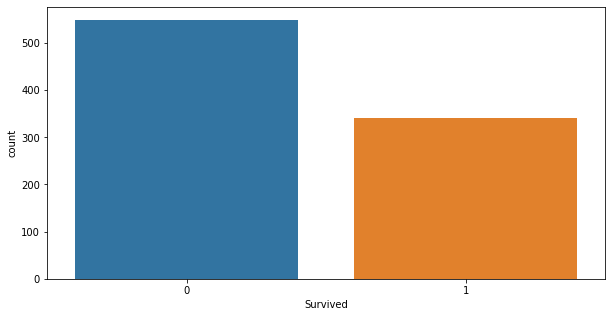

In [20]:
## 3. 각 칼럼별 분포 확인
sns.countplot(x='Survived', data=data)

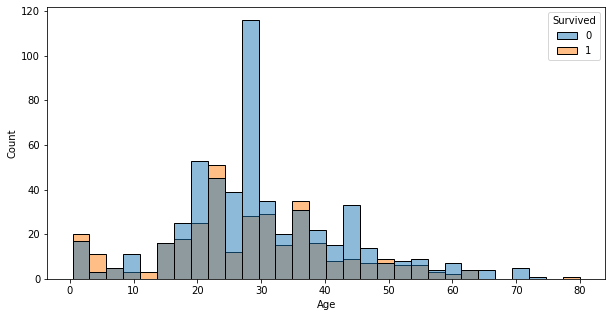

In [21]:
sns.histplot(x='Age', hue='Survived', bins=30, data=data)

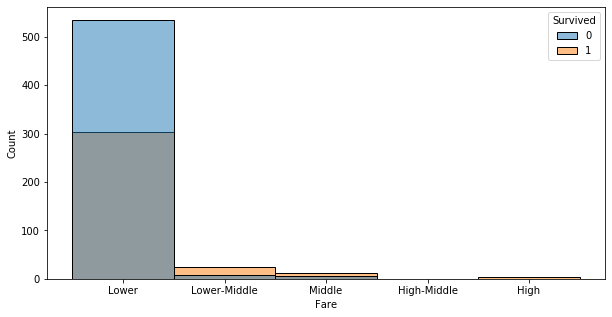

In [22]:
fare_class = ['Lower', 'Lower-Middle', 'Middle','High-Middle' ,'High']
sns.histplot(x=pd.cut(data.Fare, 5, labels=fare_class), hue='Survived', data=data)

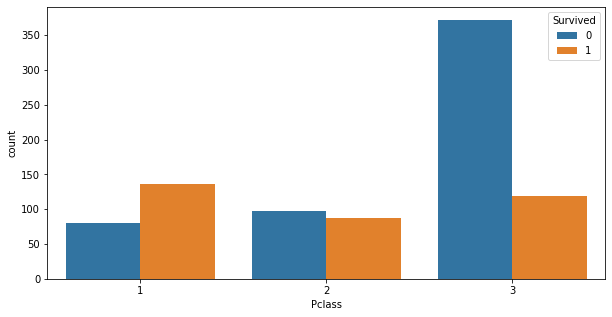

In [23]:
sns.countplot(x='Pclass', hue='Survived', data=data)

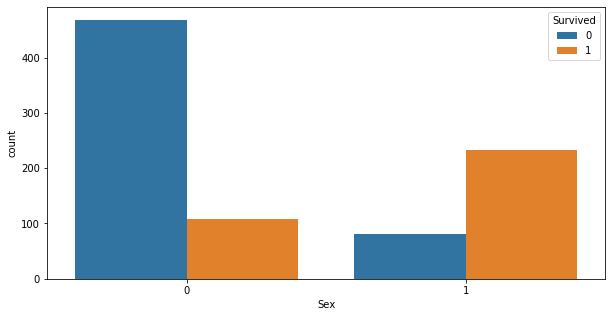

In [24]:
sns.countplot(x='Sex', hue='Survived', data=data)

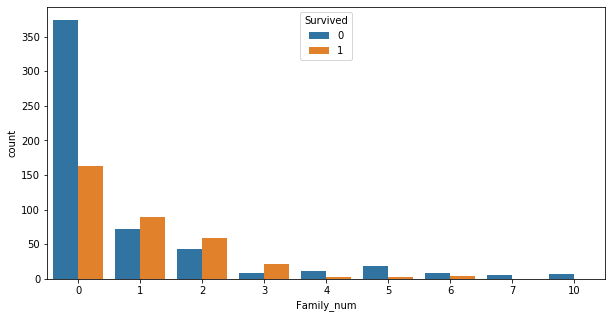

In [25]:
sns.countplot(x='Family_num', hue='Survived', data=data)

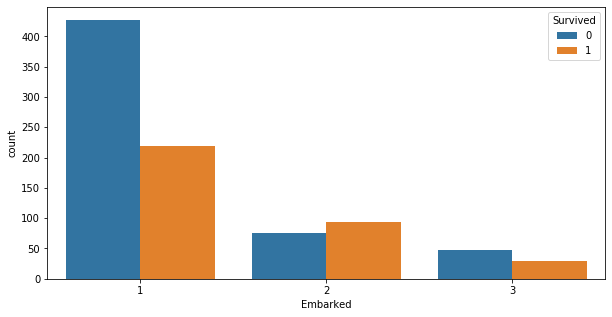

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=data)

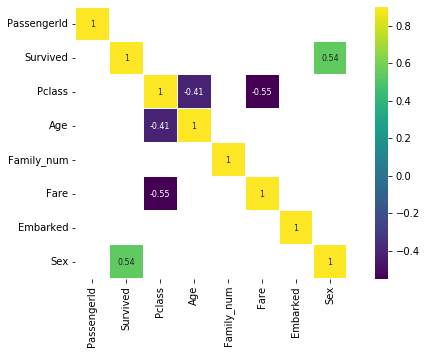

In [30]:
# 4. 칼럼 별 상관관계 파악하기
corr = data.corr()

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], cmap = 'viridis', vmax = 0.9, linewidth = 0.1, annot = True, annot_kws = {'size': 8}, square = True)

### Reference
https://rfriend.tistory.com/636

https://www.kaggle.com/code/anhvutruong/titanic